In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

In [3]:
filename =  os.path.join(os.getcwd(),"wdata.csv")
df = pd.read_csv(filename, header=0)

In [4]:
df.head()

,City,State,Zip,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,...,"Eyes, Ears, Nose, & Throat",Resipiratory,Digestive,Circulatory,Skin,Brain,Nervous,Urinary,Immune,Reproductive
0,Mountain Brook,Alabama,35223,ND,Nd,14,Nd,NaN,11,Nd,...,"Sneezing/Allergies, Dry/Irritated eyes, Chroni...",NaN,"Diarrhea/Constipation, Bloating, Abdominal pai...","Raynaud's phenomenon, Low or reactive blood pr...","Itchy/Peeling skin, Skin rash, Fungal infections",Brain fog,"Anxiousness, Fatigue",Overactive bladder,NaN,"Changes in menstrual cycle, Inconsistent menst..."
1,Wasilla,Alaska,99623,ND,ND,12,ND,5,ND,ND,...,"Sneezing/Allergies, Runny nose/Post-nasal drip...","Shortness of breath, Chronic dry cough, Chroni...","Significant weight gain/loss, Diarrhea/Constip...","Cherry angiomas, Easy bruising/bleeding","Itchy/Peeling skin, Skin rash, Eczema","Brain fog, Memory loss, Anger/Aggressiveness","Anxiousness, Depression, Headache, Migraine, I...",NaN,Long-lasting colds,"Vaginal yeast or bacterial infections, Hormone..."
2,Soldotna,Alaska,99669-8654,ND,3,3,234,NaN,6,ND,...,"Sneezing/Allergies, Runny nose/Post-nasal drip...","Shortness of breath, Heaviness in the chest","Significant weight gain/loss, Bloating, Sweet ...","Spider veins, Easy bruising/bleeding, Iron def...","Itchy/Peeling skin, Flushing, Fungal infections","Brain fog, Confusion, Memory loss, Trouble fin...","Anxiousness, Depression, Headache, Insomnia, F...",Overactive bladder,"Increased susceptibility to infection, Chronic...","Changes in menstrual cycle, Inconsistent menst..."
3,Soldotna,Alaska,99669,ND,ND,ND,ND,NaN,ND,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anchorage,Alaska,99508-4014,64,5,32,ND,NaN,6,ND,...,"Runny nose/Post-nasal drip, Ear popping/ringin...",NaN,Significant weight gain/loss,"Spider veins, Cherry angiomas, Raynaud's pheno...",Eczema,"Brain fog, Trouble finding the right word, Ang...","Anxiousness, Fatigue",NaN,NaN,NaN


In [5]:
df.shape

(581, 56)

In [6]:

df

,City,State,Zip,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,...,"Eyes, Ears, Nose, & Throat",Resipiratory,Digestive,Circulatory,Skin,Brain,Nervous,Urinary,Immune,Reproductive
0,Mountain Brook,Alabama,35223,ND,Nd,14,Nd,NaN,11,Nd,...,"Sneezing/Allergies, Dry/Irritated eyes, Chroni...",NaN,"Diarrhea/Constipation, Bloating, Abdominal pai...","Raynaud's phenomenon, Low or reactive blood pr...","Itchy/Peeling skin, Skin rash, Fungal infections",Brain fog,"Anxiousness, Fatigue",Overactive bladder,NaN,"Changes in menstrual cycle, Inconsistent menst..."
1,Wasilla,Alaska,99623,ND,ND,12,ND,5,ND,ND,...,"Sneezing/Allergies, Runny nose/Post-nasal drip...","Shortness of breath, Chronic dry cough, Chroni...","Significant weight gain/loss, Diarrhea/Constip...","Cherry angiomas, Easy bruising/bleeding","Itchy/Peeling skin, Skin rash, Eczema","Brain fog, Memory loss, Anger/Aggressiveness","Anxiousness, Depression, Headache, Migraine, I...",NaN,Long-lasting colds,"Vaginal yeast or bacterial infections, Hormone..."
2,Soldotna,Alaska,99669-8654,ND,3,3,234,NaN,6,ND,...,"Sneezing/Allergies, Runny nose/Post-nasal drip...","Shortness of breath, Heaviness in the chest","Significant weight gain/loss, Bloating, Sweet ...","Spider veins, Easy bruising/bleeding, Iron def...","Itchy/Peeling skin, Flushing, Fungal infections","Brain fog, Confusion, Memory loss, Trouble fin...","Anxiousness, Depression, Headache, Insomnia, F...",Overactive bladder,"Increased susceptibility to infection, Chronic...","Changes in menstrual cycle, Inconsistent menst..."
3,Soldotna,Alaska,99669,ND,ND,ND,ND,NaN,ND,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anchorage,Alaska,99508-4014,64,5,32,ND,NaN,6,ND,...,"Runny nose/Post-nasal drip, Ear popping/ringin...",NaN,Significant weight gain/loss,"Spider veins, Cherry angiomas, Raynaud's pheno...",Eczema,"Brain fog, Trouble finding the right word, Ang...","Anxiousness, Fatigue",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Greenfield,Wisconsin,53221,<1,1,30,29,NaN,14,4,...,NaN,NaN,"Significant weight gain/loss, Nausea/Vomiting,...",Cherry angiomas,"Itchy/Peeling skin, Burning sensation, Flushin...",NaN,Dysautonomia,NaN,NaN,"Changes in menstrual cycle, Vaginal yeast or b..."
577,Shorewood,Wisconsin,53211,11,16,170,6,NaN,54,3,...,NaN,NaN,NaN,NaN,Itchy/Peeling skin,Brain fog,NaN,NaN,NaN,NaN
578,Waukesha,Wisconsin,53189-7102,5,16,311,27,NaN,2,9,...,"Dry/Irritated eyes, Chronic sinusitis",Asthma/Wheezing,Parasites,Raynaud's phenomenon,Itchy/Peeling skin,NaN,Fatigue,Bladder infection symptoms with no identifiabl...,Increased susceptibility to infection,NaN
579,Laramie,Wyoming,82072,3,7,149,ND,70,ND,ND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
tra = []
for traverse_rows in range(0,580):
    if df.iloc[traverse_rows].isnull().values.any()==True:
        tra.insert(len(tra),traverse_rows)
        

In [8]:
for t in tra:
    for columns in range(0,11):
        if df.iloc[t,columns]== "ND":
            df.iloc[t,columns] = 0
        if df.iloc[t,columns]== "Nd":
            df.iloc[t,columns] = 0
        if df.iloc[t,columns]== "NaN":
            df.iloc[t,columns] = 0
        if df.iloc[580,columns]=="ND":
            df.iloc[580,columns] = 0
            

In [9]:
df = df.fillna(0)
myList = ['Unnamed: 42', 'Unnamed: 43','Zip' , 'Health Concerns?']
df = df.drop(columns=myList)

In [10]:
df

,City,State,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,Aspergillus sydowii,...,"Eyes, Ears, Nose, & Throat",Resipiratory,Digestive,Circulatory,Skin,Brain,Nervous,Urinary,Immune,Reproductive
0,Mountain Brook,Alabama,0,0,14,0,0,11,0,0,...,"Sneezing/Allergies, Dry/Irritated eyes, Chroni...",0,"Diarrhea/Constipation, Bloating, Abdominal pai...","Raynaud's phenomenon, Low or reactive blood pr...","Itchy/Peeling skin, Skin rash, Fungal infections",Brain fog,"Anxiousness, Fatigue",Overactive bladder,0,"Changes in menstrual cycle, Inconsistent menst..."
1,Wasilla,Alaska,0,0,12,0,5,0,0,0,...,"Sneezing/Allergies, Runny nose/Post-nasal drip...","Shortness of breath, Chronic dry cough, Chroni...","Significant weight gain/loss, Diarrhea/Constip...","Cherry angiomas, Easy bruising/bleeding","Itchy/Peeling skin, Skin rash, Eczema","Brain fog, Memory loss, Anger/Aggressiveness","Anxiousness, Depression, Headache, Migraine, I...",0,Long-lasting colds,"Vaginal yeast or bacterial infections, Hormone..."
2,Soldotna,Alaska,0,3,3,234,0,6,0,5,...,"Sneezing/Allergies, Runny nose/Post-nasal drip...","Shortness of breath, Heaviness in the chest","Significant weight gain/loss, Bloating, Sweet ...","Spider veins, Easy bruising/bleeding, Iron def...","Itchy/Peeling skin, Flushing, Fungal infections","Brain fog, Confusion, Memory loss, Trouble fin...","Anxiousness, Depression, Headache, Insomnia, F...",Overactive bladder,"Increased susceptibility to infection, Chronic...","Changes in menstrual cycle, Inconsistent menst..."
3,Soldotna,Alaska,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anchorage,Alaska,64,5,32,0,0,6,0,0,...,"Runny nose/Post-nasal drip, Ear popping/ringin...",0,Significant weight gain/loss,"Spider veins, Cherry angiomas, Raynaud's pheno...",Eczema,"Brain fog, Trouble finding the right word, Ang...","Anxiousness, Fatigue",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Greenfield,Wisconsin,<1,1,30,29,0,14,4,0,...,0,0,"Significant weight gain/loss, Nausea/Vomiting,...",Cherry angiomas,"Itchy/Peeling skin, Burning sensation, Flushin...",0,Dysautonomia,0,0,"Changes in menstrual cycle, Vaginal yeast or b..."
577,Shorewood,Wisconsin,11,16,170,6,0,54,3,220,...,0,0,0,0,Itchy/Peeling skin,Brain fog,0,0,0,0
578,Waukesha,Wisconsin,5,16,311,27,0,2,9,0,...,"Dry/Irritated eyes, Chronic sinusitis",Asthma/Wheezing,Parasites,Raynaud's phenomenon,Itchy/Peeling skin,0,Fatigue,Bladder infection symptoms with no identifiabl...,Increased susceptibility to infection,0
579,Laramie,Wyoming,3,7,149,0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
secondArr = []
for traverse_rows in range(0,580):
    for columns in range(11,21):
        if df.iloc[traverse_rows,columns]=="0":
            secondArr.insert(len(secondArr),traverse_rows)

In [12]:
df = df.drop(labels=secondArr,axis=0)

In [13]:
df

,City,State,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus*,Aspergillus sclerotiorum,Aspergillus sydowii,...,"Eyes, Ears, Nose, & Throat",Resipiratory,Digestive,Circulatory,Skin,Brain,Nervous,Urinary,Immune,Reproductive
0,Mountain Brook,Alabama,0,0,14,0,0,11,0,0,...,"Sneezing/Allergies, Dry/Irritated eyes, Chroni...",0,"Diarrhea/Constipation, Bloating, Abdominal pai...","Raynaud's phenomenon, Low or reactive blood pr...","Itchy/Peeling skin, Skin rash, Fungal infections",Brain fog,"Anxiousness, Fatigue",Overactive bladder,0,"Changes in menstrual cycle, Inconsistent menst..."
1,Wasilla,Alaska,0,0,12,0,5,0,0,0,...,"Sneezing/Allergies, Runny nose/Post-nasal drip...","Shortness of breath, Chronic dry cough, Chroni...","Significant weight gain/loss, Diarrhea/Constip...","Cherry angiomas, Easy bruising/bleeding","Itchy/Peeling skin, Skin rash, Eczema","Brain fog, Memory loss, Anger/Aggressiveness","Anxiousness, Depression, Headache, Migraine, I...",0,Long-lasting colds,"Vaginal yeast or bacterial infections, Hormone..."
2,Soldotna,Alaska,0,3,3,234,0,6,0,5,...,"Sneezing/Allergies, Runny nose/Post-nasal drip...","Shortness of breath, Heaviness in the chest","Significant weight gain/loss, Bloating, Sweet ...","Spider veins, Easy bruising/bleeding, Iron def...","Itchy/Peeling skin, Flushing, Fungal infections","Brain fog, Confusion, Memory loss, Trouble fin...","Anxiousness, Depression, Headache, Insomnia, F...",Overactive bladder,"Increased susceptibility to infection, Chronic...","Changes in menstrual cycle, Inconsistent menst..."
3,Soldotna,Alaska,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anchorage,Alaska,64,5,32,0,0,6,0,0,...,"Runny nose/Post-nasal drip, Ear popping/ringin...",0,Significant weight gain/loss,"Spider veins, Cherry angiomas, Raynaud's pheno...",Eczema,"Brain fog, Trouble finding the right word, Ang...","Anxiousness, Fatigue",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Greenfield,Wisconsin,<1,1,30,29,0,14,4,0,...,0,0,"Significant weight gain/loss, Nausea/Vomiting,...",Cherry angiomas,"Itchy/Peeling skin, Burning sensation, Flushin...",0,Dysautonomia,0,0,"Changes in menstrual cycle, Vaginal yeast or b..."
577,Shorewood,Wisconsin,11,16,170,6,0,54,3,220,...,0,0,0,0,Itchy/Peeling skin,Brain fog,0,0,0,0
578,Waukesha,Wisconsin,5,16,311,27,0,2,9,0,...,"Dry/Irritated eyes, Chronic sinusitis",Asthma/Wheezing,Parasites,Raynaud's phenomenon,Itchy/Peeling skin,0,Fatigue,Bladder infection symptoms with no identifiabl...,Increased susceptibility to infection,0
579,Laramie,Wyoming,3,7,149,0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.columns = df.columns.str.replace("*","")

In [15]:
df.columns

Index(['City', 'State', 'Aspergillus flavus/oryzae', 'Aspergillus fumigatus',
       'Aspergillus niger', 'Aspergillus ochraceus',
       'Aspergillus penicillioides', 'Aspergillus restrictus',
       'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis',
       'Aspergillus versicolor', 'Aureobasidium pullulans',
       'Chaetomium globosum', 'Cladosporium sphaerospermum',
       'Eurotium (Asp.) amstelodami', 'Paecilomyces variotii',
       'Penicillium brevicompactum', 'Penicillium corylophilum',
       'Penicillium crustosum', 'Penicillium purpurogenum',
       'Penicillium spinulosum', 'Penicillium variabile',
       'Scopulariopsis brevicaulis/fusca', 'Scopulariopsis chartarum',
       'Stachybotrys chartarum', 'Trichoderma viride', 'Wallemia sebi',
       'Sum of the Logs (Group I)', 'Acremonium strictum',
       'Alternaria alternata', 'Aspergillus ustus',
       'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2',
       'Cladosporium herbarum'

In [17]:
myList2 = ['Diagnoses', 'Eyes, Ears, Nose, & Throat','Resipiratory' , 'Digestive', 'Circulatory','Brain','Nervous','Urinary','Reproductive']
df = df.drop(columns=myList2)

In [18]:
df.columns

Index(['City', 'State', 'Aspergillus flavus/oryzae', 'Aspergillus fumigatus',
       'Aspergillus niger', 'Aspergillus ochraceus',
       'Aspergillus penicillioides', 'Aspergillus restrictus',
       'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis',
       'Aspergillus versicolor', 'Aureobasidium pullulans',
       'Chaetomium globosum', 'Cladosporium sphaerospermum',
       'Eurotium (Asp.) amstelodami', 'Paecilomyces variotii',
       'Penicillium brevicompactum', 'Penicillium corylophilum',
       'Penicillium crustosum', 'Penicillium purpurogenum',
       'Penicillium spinulosum', 'Penicillium variabile',
       'Scopulariopsis brevicaulis/fusca', 'Scopulariopsis chartarum',
       'Stachybotrys chartarum', 'Trichoderma viride', 'Wallemia sebi',
       'Sum of the Logs (Group I)', 'Acremonium strictum',
       'Alternaria alternata', 'Aspergillus ustus',
       'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2',
       'Cladosporium herbarum'

In [19]:
df

,City,State,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus,Aspergillus sclerotiorum,Aspergillus sydowii,...,Cladosporium cladosporioides 2,Cladosporium herbarum,Epicoccum nigrum,Mucor amphibiorum,Penicillium chrysogenum,Rhizopus stolonifer,Sum of the Logs (Group II),ERMI Score (Group I - Group II),Skin,Immune
0,Mountain Brook,Alabama,0,0,14,0,0,11,0,0,...,0,0,372,10,29,6,16.60,9.20,"Itchy/Peeling skin, Skin rash, Fungal infections",0
1,Wasilla,Alaska,0,0,12,0,5,0,0,0,...,12,114,67,24,111*,ND,11.00,2.50,"Itchy/Peeling skin, Skin rash, Eczema",Long-lasting colds
2,Soldotna,Alaska,0,3,3,234,0,6,0,5,...,0,0,60,173,70,ND,15.70,6.40,"Itchy/Peeling skin, Flushing, Fungal infections","Increased susceptibility to infection, Chronic..."
3,Soldotna,Alaska,0,0,0,0,0,0,0,0,...,0,0,435,4,49,ND,10.00,0.10,0,0
4,Anchorage,Alaska,64,5,32,0,0,6,0,0,...,0,0,2,7,83,12,11.45,5.83,Eczema,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Greenfield,Wisconsin,<1,1,30,29,0,14,4,0,...,0,0,130,1,510,<1,13.63,10.82,"Itchy/Peeling skin, Burning sensation, Flushin...",0
577,Shorewood,Wisconsin,11,16,170,6,0,54,3,220,...,0,0,990,10,81,<1,21.54,19.05,Itchy/Peeling skin,0
578,Waukesha,Wisconsin,5,16,311,27,0,2,9,0,...,0,0,5312,38,597,ND,22.20,10.60,Itchy/Peeling skin,Increased susceptibility to infection
579,Laramie,Wyoming,3,7,149,0,70,0,0,0,...,17,14123,2974,33,20,2,19.60,2.20,0,0


In [20]:
k=8

In [56]:
df['Skin_Val'] = 0.0

In [57]:
df


,City,State,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus,Aspergillus sclerotiorum,Aspergillus sydowii,...,Cladosporium herbarum,Epicoccum nigrum,Mucor amphibiorum,Penicillium chrysogenum,Rhizopus stolonifer,Sum of the Logs (Group II),ERMI Score (Group I - Group II),Skin,Immune,Skin_Val
0,Mountain Brook,Alabama,0,0,14,0,0,11,0,0,...,0,372,10,29,6,16.60,9.20,"Itchy/Peeling skin, Skin rash, Fungal infections",0,0.0
1,Wasilla,Alaska,0,0,12,0,5,0,0,0,...,114,67,24,111*,ND,11.00,2.50,"Itchy/Peeling skin, Skin rash, Eczema",Long-lasting colds,0.0
2,Soldotna,Alaska,0,3,3,234,0,6,0,5,...,0,60,173,70,ND,15.70,6.40,"Itchy/Peeling skin, Flushing, Fungal infections","Increased susceptibility to infection, Chronic...",0.0
3,Soldotna,Alaska,0,0,0,0,0,0,0,0,...,0,435,4,49,ND,10.00,0.10,0,0,0.0
4,Anchorage,Alaska,64,5,32,0,0,6,0,0,...,0,2,7,83,12,11.45,5.83,Eczema,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Greenfield,Wisconsin,<1,1,30,29,0,14,4,0,...,0,130,1,510,<1,13.63,10.82,"Itchy/Peeling skin, Burning sensation, Flushin...",0,0.0
577,Shorewood,Wisconsin,11,16,170,6,0,54,3,220,...,0,990,10,81,<1,21.54,19.05,Itchy/Peeling skin,0,0.0
578,Waukesha,Wisconsin,5,16,311,27,0,2,9,0,...,0,5312,38,597,ND,22.20,10.60,Itchy/Peeling skin,Increased susceptibility to infection,0.0
579,Laramie,Wyoming,3,7,149,0,70,0,0,0,...,14123,2974,33,20,2,19.60,2.20,0,0,0.0


In [72]:
print(df.iloc[0,1])

Alabama


In [73]:
df.at[0,1] = 'hi'

In [74]:
print(df.iloc[0,1])


Alabama


In [121]:
for trave in range(0,533):
    for columns in range(41,43):
        if df.iloc[trave,columns]!= 0:
            df.iloc[trave,columns] = 1.0
        if df.iloc[trave,columns]== 0:
            df.iloc[trave,columns] = 0.0


In [122]:
df

,City,State,Aspergillus flavus/oryzae,Aspergillus fumigatus,Aspergillus niger,Aspergillus ochraceus,Aspergillus penicillioides,Aspergillus restrictus,Aspergillus sclerotiorum,Aspergillus sydowii,...,Epicoccum nigrum,Mucor amphibiorum,Penicillium chrysogenum,Rhizopus stolonifer,Sum of the Logs (Group II),ERMI Score (Group I - Group II),Skin,Immune,Skin_Val,1
0,Mountain Brook,Alabama,0,0,14,0,0,11,0,0,...,372,10,29,6,16.60,9.20,1.0,0.0,0.0,hi
1,Wasilla,Alaska,0,0,12,0,5,0,0,0,...,67,24,111*,ND,11.00,2.50,1.0,1.0,0.0,hi
2,Soldotna,Alaska,0,3,3,234,0,6,0,5,...,60,173,70,ND,15.70,6.40,1.0,1.0,0.0,NaN
3,Soldotna,Alaska,0,0,0,0,0,0,0,0,...,435,4,49,ND,10.00,0.10,1.0,0.0,0.0,NaN
4,Anchorage,Alaska,64,5,32,0,0,6,0,0,...,2,7,83,12,11.45,5.83,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,Greenfield,Wisconsin,<1,1,30,29,0,14,4,0,...,130,1,510,<1,13.63,10.82,1.0,0.0,0.0,NaN
577,Shorewood,Wisconsin,11,16,170,6,0,54,3,220,...,990,10,81,<1,21.54,19.05,1.0,0.0,0.0,NaN
578,Waukesha,Wisconsin,5,16,311,27,0,2,9,0,...,5312,38,597,ND,22.20,10.60,1.0,1.0,0.0,NaN
579,Laramie,Wyoming,3,7,149,0,70,0,0,0,...,2974,33,20,2,19.60,2.20,1.0,0.0,0.0,NaN


In [123]:
X = df[['Skin','Immune']]

In [124]:
kmeans = KMeans(n_clusters=k)

In [125]:
kmeans.fit(X)

KMeans()

In [129]:
df['cluster'] = kmeans.labels_

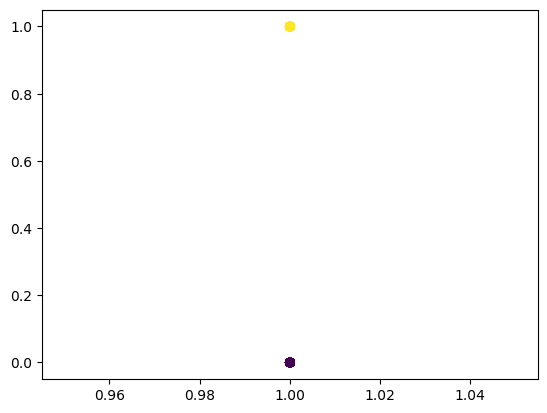

In [131]:
plt.scatter(df['Skin'],df['Immune'],c = df['cluster'])
plt.show()